In [11]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import cv2
from collections import Counter
from skimage.color import rgb2lab, deltaE_cie76
import os
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import colors
from matplotlib.colors import hsv_to_rgb
import webcolors
from tkinter import filedialog
from tkinter import *


%matplotlib notebook


def closest_colour(requested_colour):
    min_colours = {}
    for key, name in webcolors.css3_hex_to_names.items():
        r_c, g_c, b_c = webcolors.hex_to_rgb(key)
        rd = (r_c - requested_colour[0]) ** 2
        gd = (g_c - requested_colour[1]) ** 2
        bd = (b_c - requested_colour[2]) ** 2
        min_colours[(rd + gd + bd)] = name
    return min_colours[min(min_colours.keys())]

def get_colour_name(requested_colour):
    try:
        closest_name = actual_name = webcolors.rgb_to_name(requested_colour)
    except ValueError:
        closest_name = closest_colour(requested_colour)
        actual_name = None
    return actual_name, closest_name

def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

def get_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

def get_colors(image, number_of_colors, show_chart):
    
    modified_image = cv2.resize(image, (300, 200), interpolation = cv2.INTER_AREA)
    modified_image = modified_image.reshape(modified_image.shape[0]*modified_image.shape[1], 3)
    
    clf = KMeans(n_clusters = number_of_colors)
    labels = clf.fit_predict(modified_image)
    
    counts = Counter(labels)
    # sort to ensure correct color percentage
    counts = dict(sorted(counts.items()))
    
     
    print(counts)
    
    
    center_colors = clf.cluster_centers_
    # We get ordered colors by iterating through the keys
    
    ordered_colors = [center_colors[i] for i in counts.keys()]
    
    hex_names = [(closest_colour(ordered_colors[i])) for i in counts.keys()]
    hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
    rgb_colors = [ordered_colors[i] for i in counts.keys()]
    
    for i in counts.keys():
        print (ordered_colors[i], closest_colour(ordered_colors[i]))
    
    # remove the first element, which we know will be black because that is the majority of the image after masking
    counts_no_black = list(counts.values())
    counts_no_black.pop(0)
    hex_names.pop(0)
    hex_colors.pop(0)
    if (show_chart):
        plt.figure(figsize = (8, 6))
        plt.pie(counts_no_black, labels = hex_names, colors = hex_colors)
    
    return rgb_colors

In [12]:
root = Tk()
root.filename =  filedialog.askopenfilename(initialdir = "/",title = "Select file",filetypes = (("jpeg files","*.jpg"),("all files","*.*")))


nemo = cv2.imread(root.filename)

In [4]:
nemo = cv2.cvtColor(nemo, cv2.COLOR_BGR2RGB)

<IPython.core.display.Javascript object>


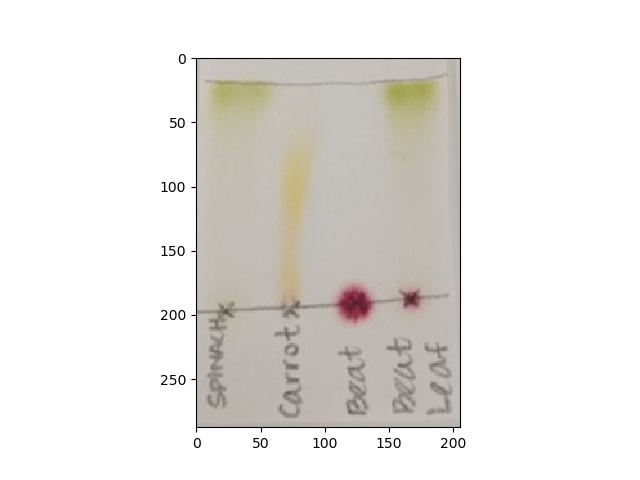

In [5]:
plt.imshow(nemo)
plt.show()

<IPython.core.display.Javascript object>


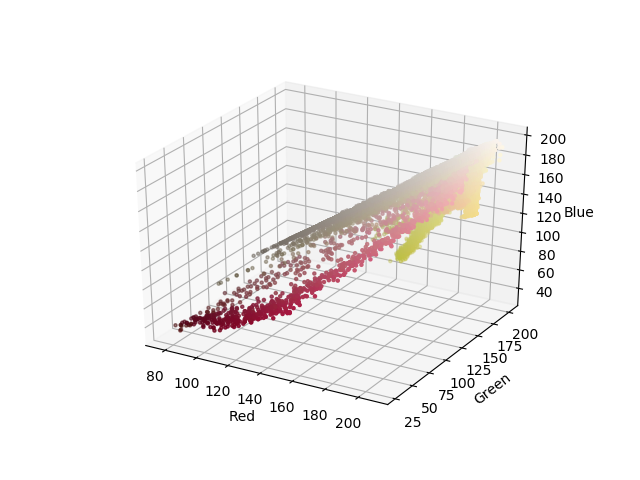

In [6]:
r, g, b = cv2.split(nemo)
    
fig = plt.figure()
axis = fig.add_subplot(1, 1, 1, projection="3d")
pixel_colors = nemo.reshape((np.shape(nemo)[0] * np.shape(nemo)[1], 3))
norm = colors.Normalize(vmin=-1.0, vmax=1.0)
norm.autoscale(pixel_colors)
pixel_colors = norm(pixel_colors).tolist()
    
axis.scatter(
    r.flatten(), g.flatten(), b.flatten(), facecolors=pixel_colors, marker="."
    )
axis.set_xlabel("Red")
axis.set_ylabel("Green")
axis.set_zlabel("Blue")
plt.show()

<IPython.core.display.Javascript object>


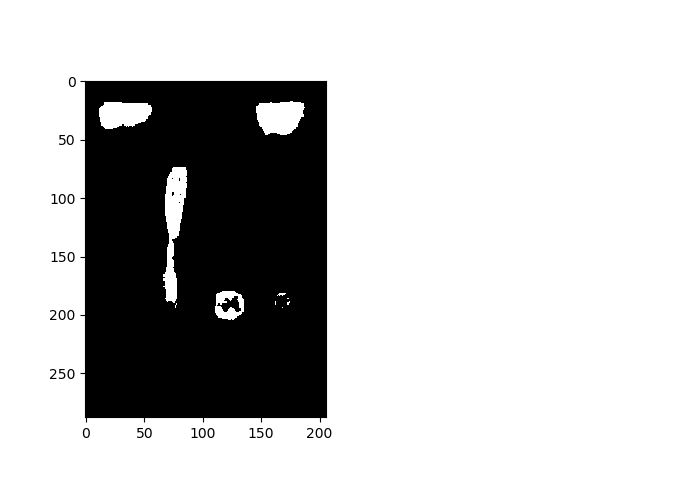

In [8]:
hsv_nemo = cv2.cvtColor(nemo, cv2.COLOR_RGB2HSV)

h, s, v = cv2.split(hsv_nemo)
    
fig = plt.figure()
axis = fig.add_subplot(1, 1, 1, projection="3d")
    
axis.scatter(
    h.flatten(), s.flatten(), v.flatten(), facecolors=pixel_colors, marker="."
    )
axis.set_xlabel("Hue")
axis.set_ylabel("Saturation")
axis.set_zlabel("Value")
plt.show()

In [9]:
light_orange = (0,60,120)
dark_orange = (175,200,200)

    
mask = cv2.inRange(hsv_nemo, light_orange, dark_orange)
plt.subplot(1, 2, 1)
plt.imshow(mask, cmap="gray")
    
# Bitwise-AND mask and original image  
result = cv2.bitwise_and(nemo, nemo, mask=mask)

<IPython.core.display.Javascript object>


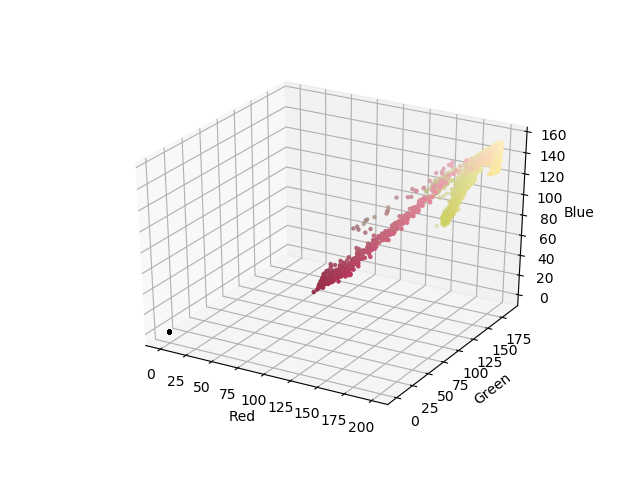

<IPython.core.display.Javascript object>


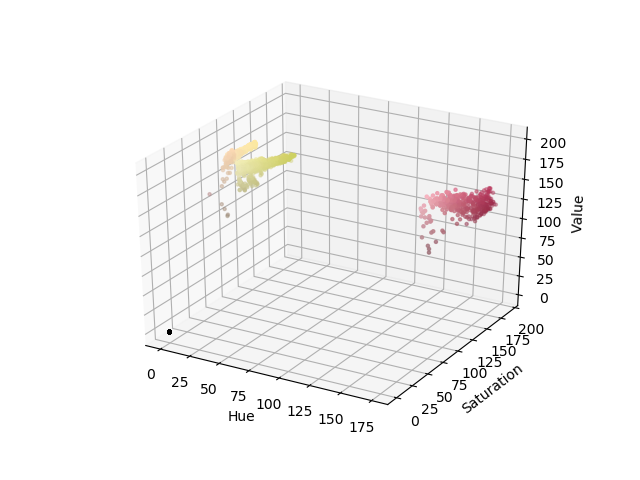

In [10]:
    # replotting after filter
    nemo = result
    
    r, g, b = cv2.split(nemo)
    
    fig = plt.figure()
    axis = fig.add_subplot(1, 1, 1, projection="3d")
    pixel_colors = nemo.reshape((np.shape(nemo)[0] * np.shape(nemo)[1], 3))
    norm = colors.Normalize(vmin=-1.0, vmax=1.0)
    norm.autoscale(pixel_colors)
    pixel_colors = norm(pixel_colors).tolist()
    
    axis.scatter(
        r.flatten(), g.flatten(), b.flatten(), facecolors=pixel_colors, marker="."
    )
    axis.set_xlabel("Red")
    axis.set_ylabel("Green")
    axis.set_zlabel("Blue")
    plt.show()
    
    hsv_nemo = cv2.cvtColor(nemo, cv2.COLOR_RGB2HSV)
    
    h, s, v = cv2.split(hsv_nemo)
    
    fig = plt.figure()
    axis = fig.add_subplot(1, 1, 1, projection="3d")
    
    axis.scatter(
        h.flatten(), s.flatten(), v.flatten(), facecolors=pixel_colors, marker="."
    )
    axis.set_xlabel("Hue")
    axis.set_ylabel("Saturation")
    axis.set_zlabel("Value")
    plt.show()